## Import Required Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

##Load the Dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


##Creating the Model

In [3]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatter the output before feeding to the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Fit the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3213 - loss: 1.8174 - val_accuracy: 0.5021 - val_loss: 1.3940
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5145 - loss: 1.3426 - val_accuracy: 0.5708 - val_loss: 1.2263
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5770 - loss: 1.1791 - val_accuracy: 0.6088 - val_loss: 1.1251
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6243 - loss: 1.0551 - val_accuracy: 0.6325 - val_loss: 1.0548
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6593 - loss: 0.9714 - val_accuracy: 0.6517 - val_loss: 0.9994
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6829 - loss: 0.8994 - val_accuracy: 0.6587 - val_loss: 0.9919
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7041 - loss: 0.8494 - val_accuracy: 0.6782 - val_loss: 0.9299
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7211 - loss: 0.8002 - val_accuracy: 0.

## Calculate Accuracy

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6899 - loss: 0.9044
Test accuracy: 0.6869000196456909


##Visual Representation

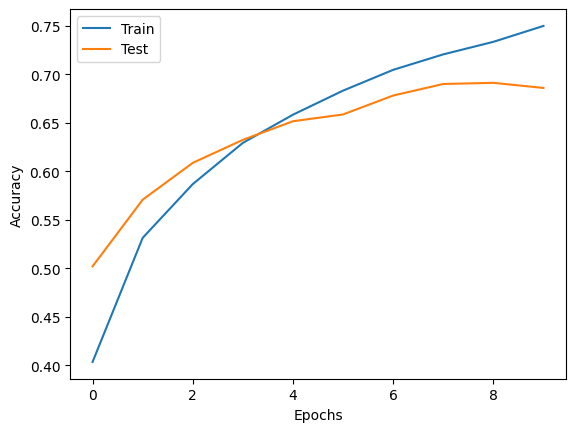

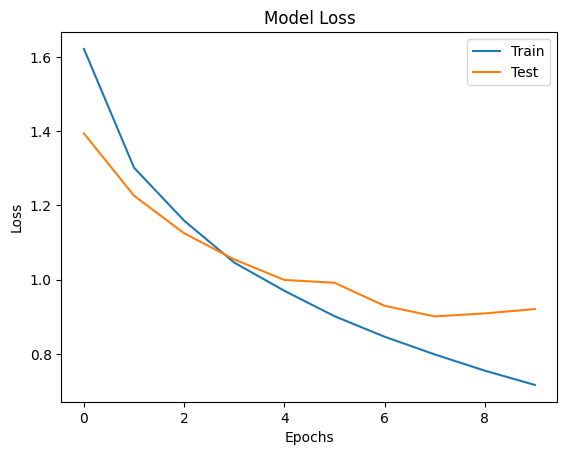

In [7]:
# Plot training and validation accuracy values
import matplotlib.pyplot as plt
# plt.figure(figsize = (12,6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & Validation loss values
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

##Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


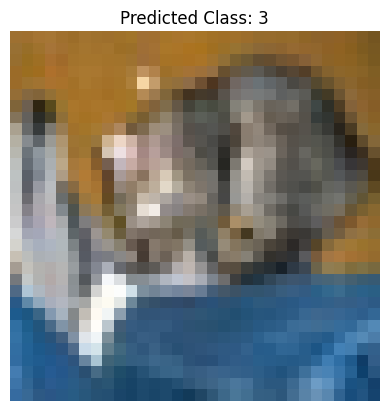

In [8]:
# Make Predictions on test data
predictions = model.predict(x_test)

# Display the first image and its predicted class
plt.imshow(x_test[0])
plt.title(f'Predicted Class: {predictions[0].argmax()}')
plt.axis('off')
plt.show()